In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl  
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [13]:
# Bước 1: load dữ liệu
df = pd.read_excel('lophoc.xlsx',sheet_name="data")
df

,Sức khỏe,Thời tiết,Kết quả
0,ốm,u ám,nghỉ
1,ốm,mưa,nghỉ
2,ốm,nắng,nghỉ
3,ốm,u ám,học
4,tốt,u ám,học
5,tốt,mưa,học
6,tốt,nắng,nghỉ


In [14]:
# Tập dữ liệu Input(Đặc trưng) và Output(Mục tiêu)
X = df.iloc[:, :-1] #Features
y = df.iloc[:, -1] #Target variables

X

,Sức khỏe,Thời tiết
0,ốm,u ám
1,ốm,mưa
2,ốm,nắng
3,ốm,u ám
4,tốt,u ám
5,tốt,mưa
6,tốt,nắng


In [15]:
from sklearn.preprocessing import LabelEncoder

Sức khỏe: ốm = 1, tốt = 0
Thời tiết: mưa = 0, nắng =1, u ám = 2 

In [16]:
encHealth = LabelEncoder()
X['Sức khỏe'] = encHealth.fit_transform(X['Sức khỏe'])

encWeather = LabelEncoder()
X['Thời tiết'] = encHealth.fit_transform(X['Thời tiết'])

C:\Users\T14\AppData\Local\Temp\ipykernel_1756\1965954292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sức khỏe'] = encHealth.fit_transform(X['Sức khỏe'])
C:\Users\T14\AppData\Local\Temp\ipykernel_1756\1965954292.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Thời tiết'] = encHealth.fit_transform(X['Thời tiết'])


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=34)

In [18]:
X_train

,Sức khỏe,Thời tiết
4,0,2
6,0,1
5,0,0
2,1,1
1,1,0


In [19]:
y_train

4     học
6    nghỉ
5     học
2    nghỉ
1    nghỉ
Name: Kết quả, dtype: object

In [20]:
from sklearn.tree import DecisionTreeClassifier
modelDT = DecisionTreeClassifier(criterion="entropy", max_depth=3)

modelDT = modelDT.fit(X_train, y_train)

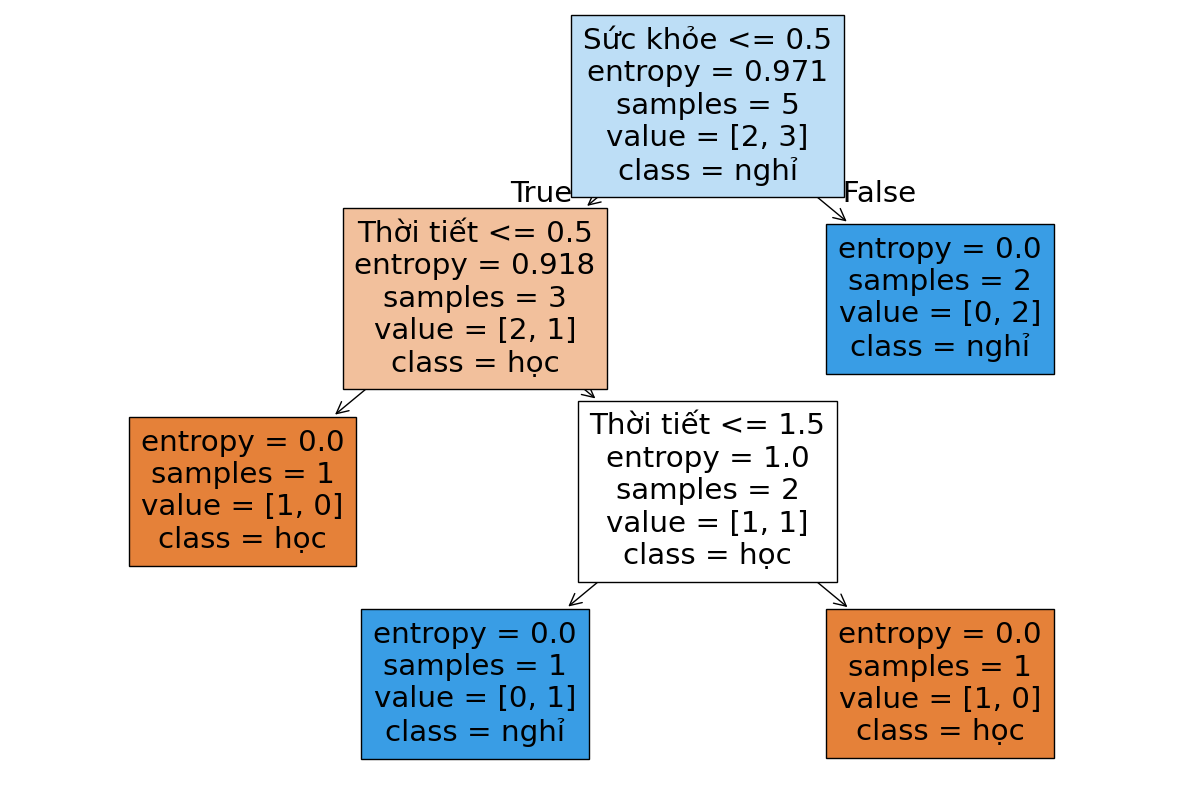

In [21]:
from sklearn.tree import plot_tree

feature_cols = X_train.columns

plt.figure(figsize=(15,10))
plot_tree(modelDT, feature_names= feature_cols, class_names = modelDT.classes_, filled = True)
plt.show()